# 1. Import and Install Dependencies

In [1]:
#!pip install mediapipe --user


In [2]:
pip freeze

absl-py @ file:///C:/b/abs_d3cv5rzljl/croot/absl-py_1686852506854/work
aiohttp @ file:///C:/b/abs_bc6tmjiy12/croot/aiohttp_1701112585940/work
aiosignal @ file:///tmp/build/80754af9/aiosignal_1637843061372/work
anyio @ file:///C:/ci/anyio_1644481856696/work/dist
argon2-cffi @ file:///opt/conda/conda-bld/argon2-cffi_1645000214183/work
argon2-cffi-bindings @ file:///C:/ci/argon2-cffi-bindings_1644569876605/work
asttokens @ file:///opt/conda/conda-bld/asttokens_1646925590279/work
astunparse==1.6.3
async-lru @ file:///C:/b/abs_e0hjkvwwb5/croot/async-lru_1699554572212/work
async-timeout @ file:///C:/b/abs_43ozhz2a8g/croots/recipe/async-timeout_1664876362767/work
attrs @ file:///C:/b/abs_35n0jusce8/croot/attrs_1695717880170/work
Babel @ file:///C:/b/abs_a2shv_3tqi/croot/babel_1671782804377/work
backcall @ file:///home/ktietz/src/ci/backcall_1611930011877/work
beautifulsoup4 @ file:///C:/b/abs_0agyz1wsr4/croot/beautifulsoup4-split_1681493048687/work
bleach @ file:///opt/conda/conda-bld/bleach_

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential


# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities
holistic = mp_holistic.Holistic(min_detection_confidence=0.2, min_tracking_confidence=0.2)


In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)  # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)   # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)  # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections


In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
                              mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1))

    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2))

    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2))

    # Draw right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2))


In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
      
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
draw_landmarks(frame, results)

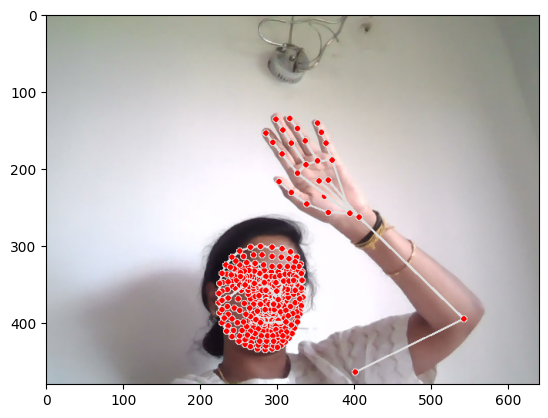

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [10]:
# len(results.left_hand_landmarks.landmark)
if results.left_hand_landmarks and results.left_hand_landmarks.landmark:
    num_landmarks_left_hand = len(results.left_hand_landmarks.landmark)
    print("Number of landmarks in the left hand:", num_landmarks_left_hand)
else:
    print("Left hand landmarks not detected or not present in this frame.")



Number of landmarks in the left hand: 21


In [11]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [12]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [13]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [14]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [15]:
result_test = extract_keypoints(results)

In [16]:
result_test

array([ 0.47082964,  0.772852  , -0.66447186, ...,  0.        ,
        0.        ,  0.        ])

In [17]:
np.save('0', result_test)

In [18]:
np.load('0.npy')

array([ 0.47082964,  0.772852  , -0.66447186, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [19]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [20]:
for action in actions:
    action_path = os.path.join(DATA_PATH, action + os.sep)

    # Check if the action directory exists; if not, create it
    if not os.path.exists(action_path):
        os.makedirs(action_path)

    # Find the maximum directory number for the given action
    try:
        existing_directories = [int(d) for d in os.listdir(action_path) if d.isdigit()]
        dirmax = max(existing_directories) if existing_directories else 0
    except (ValueError, FileNotFoundError):
        dirmax = 0

    # Create directories for each sequence
    for sequence in range(1, no_sequences + 1):
        try:
            sequence_dir = os.path.join(action_path, str(dirmax + sequence))
            os.makedirs(sequence_dir)
        except FileExistsError:
            # If the directory already exists, catch the specific exception
            pass




# 5. Collect Keypoint Values for Training and Testing

In [21]:
cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp.solutions.holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # Loop through actions
    for action in actions:
        # Loop through sequences (videos)
        for sequence in range(start_folder, start_folder + no_sequences):
            # Loop through video length (sequence length)
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                results = holistic.process(frame)
                image = frame.copy()

                # Draw landmarks
                draw_styled_landmarks(image, results)

                # Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120, 200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15, 12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)  # Increase the wait duration to 2000 milliseconds (2 seconds)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15, 12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # Export keypoints
                keypoints = extract_keypoints(results)

                # Create directories if they don't exist
                npy_dir = os.path.join(DATA_PATH, action, str(sequence))
                os.makedirs(npy_dir, exist_ok=True)

                # Save NumPy file
                npy_path = os.path.join(npy_dir, str(frame_num) + '.npy')
                print(f'Saving NumPy file: {npy_path}')
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

Saving NumPy file: MP_Data\hello\30\0.npy
Saving NumPy file: MP_Data\hello\30\1.npy
Saving NumPy file: MP_Data\hello\30\2.npy
Saving NumPy file: MP_Data\hello\30\3.npy
Saving NumPy file: MP_Data\hello\30\4.npy
Saving NumPy file: MP_Data\hello\30\5.npy
Saving NumPy file: MP_Data\hello\30\6.npy
Saving NumPy file: MP_Data\hello\30\7.npy
Saving NumPy file: MP_Data\hello\30\8.npy
Saving NumPy file: MP_Data\hello\30\9.npy
Saving NumPy file: MP_Data\hello\30\10.npy
Saving NumPy file: MP_Data\hello\30\11.npy
Saving NumPy file: MP_Data\hello\30\12.npy
Saving NumPy file: MP_Data\hello\30\13.npy
Saving NumPy file: MP_Data\hello\30\14.npy
Saving NumPy file: MP_Data\hello\30\15.npy
Saving NumPy file: MP_Data\hello\30\16.npy
Saving NumPy file: MP_Data\hello\30\17.npy
Saving NumPy file: MP_Data\hello\30\18.npy
Saving NumPy file: MP_Data\hello\30\19.npy
Saving NumPy file: MP_Data\hello\30\20.npy
Saving NumPy file: MP_Data\hello\30\21.npy
Saving NumPy file: MP_Data\hello\30\22.npy
Saving NumPy file: MP

In [22]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [23]:
label_map = {label:num for num, label in enumerate(actions)}

In [24]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [25]:
import os
import numpy as np

sequences, labels = [], []

# Set the range to start from 30 and go up to 59
for action in actions:
    print(f"Current action: {action}")

    # Adjust the range to start from 30 and go up to 59
    for sequence in range(start_folder, start_folder + no_sequences):
        print(f"  Current sequence: {sequence}")

        window = []
        for frame_num in range(sequence_length):
            file_path = os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num))
            print(f"    Current file path: {file_path}")

            res = np.load(file_path)
            window.append(res)

        sequences.append(window)
        labels.append(label_map[action])
pip

Current action: hello
  Current sequence: 30
    Current file path: MP_Data\hello\30\0.npy
    Current file path: MP_Data\hello\30\1.npy
    Current file path: MP_Data\hello\30\2.npy
    Current file path: MP_Data\hello\30\3.npy
    Current file path: MP_Data\hello\30\4.npy
    Current file path: MP_Data\hello\30\5.npy
    Current file path: MP_Data\hello\30\6.npy
    Current file path: MP_Data\hello\30\7.npy
    Current file path: MP_Data\hello\30\8.npy
    Current file path: MP_Data\hello\30\9.npy
    Current file path: MP_Data\hello\30\10.npy
    Current file path: MP_Data\hello\30\11.npy
    Current file path: MP_Data\hello\30\12.npy
    Current file path: MP_Data\hello\30\13.npy
    Current file path: MP_Data\hello\30\14.npy
    Current file path: MP_Data\hello\30\15.npy
    Current file path: MP_Data\hello\30\16.npy
    Current file path: MP_Data\hello\30\17.npy
    Current file path: MP_Data\hello\30\18.npy
    Current file path: MP_Data\hello\30\19.npy
    Current file path: MP

In [26]:
for frame_num in range(sequence_length):
    test_file_path = os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num))
    print(f"    Test file path: {os.path.abspath(test_file_path)}")
    try:
        test_res = np.load(test_file_path)
    except FileNotFoundError:
        print(f"    Test file not found: {test_file_path}")


    Test file path: C:\Users\preej\IOD\Capstone\MP_Data\iloveyou\59\0.npy
    Test file path: C:\Users\preej\IOD\Capstone\MP_Data\iloveyou\59\1.npy
    Test file path: C:\Users\preej\IOD\Capstone\MP_Data\iloveyou\59\2.npy
    Test file path: C:\Users\preej\IOD\Capstone\MP_Data\iloveyou\59\3.npy
    Test file path: C:\Users\preej\IOD\Capstone\MP_Data\iloveyou\59\4.npy
    Test file path: C:\Users\preej\IOD\Capstone\MP_Data\iloveyou\59\5.npy
    Test file path: C:\Users\preej\IOD\Capstone\MP_Data\iloveyou\59\6.npy
    Test file path: C:\Users\preej\IOD\Capstone\MP_Data\iloveyou\59\7.npy
    Test file path: C:\Users\preej\IOD\Capstone\MP_Data\iloveyou\59\8.npy
    Test file path: C:\Users\preej\IOD\Capstone\MP_Data\iloveyou\59\9.npy
    Test file path: C:\Users\preej\IOD\Capstone\MP_Data\iloveyou\59\10.npy
    Test file path: C:\Users\preej\IOD\Capstone\MP_Data\iloveyou\59\11.npy
    Test file path: C:\Users\preej\IOD\Capstone\MP_Data\iloveyou\59\12.npy
    Test file path: C:\Users\preej\

In [27]:
#!pip install --upgrade numpy


In [28]:
np.array(sequences).shape

(90, 30, 1662)

In [29]:
np.array(labels).shape

(90,)

In [30]:
X = np.array(sequences)

In [31]:
X.shape

(90, 30, 1662)

In [32]:
y = to_categorical(labels).astype(int)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [34]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [36]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [37]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [38]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
keras.callbacks.ModelCheckpoint(
    'action.h5',
    monitor="val_loss",
    verbose=0,
    save_best_only=False,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch",
    initial_value_threshold=None,
)

model.fit(
    X_train, 
    y_train, 
    epochs=1000, 
    callbacks=[tb_callback],
    validation_data=(X_test, y_test),
)
model.save('action.h5')

Epoch 1/1000
3/3 [==============================] - 9s 918ms/step - loss: 2.1156 - categorical_accuracy: 0.2235 - val_loss: 1.4893 - val_categorical_accuracy: 0.2000
Epoch 2/1000
3/3 [==============================] - 1s 261ms/step - loss: 8.5896 - categorical_accuracy: 0.3529 - val_loss: 32.7914 - val_categorical_accuracy: 0.0000e+00
Epoch 3/1000
3/3 [==============================] - 1s 278ms/step - loss: 13.7260 - categorical_accuracy: 0.3059 - val_loss: 1.1994 - val_categorical_accuracy: 0.4000
Epoch 4/1000
3/3 [==============================] - 1s 304ms/step - loss: 1.9971 - categorical_accuracy: 0.2941 - val_loss: 3.1299 - val_categorical_accuracy: 0.2000
Epoch 5/1000
3/3 [==============================] - 1s 216ms/step - loss: 3.7253 - categorical_accuracy: 0.3176 - val_loss: 2.3706 - val_categorical_accuracy: 0.4000
Epoch 6/1000
3/3 [==============================] - 1s 253ms/step - loss: 2.4285 - categorical_accuracy: 0.4118 - val_loss: 3.1185 - val_categorical_accuracy: 0.400

In [ ]:
model.summary()

In [ ]:
history = model.history
# Plotting the training & validation accuracy and loss
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
fig.subplots_adjust(left=0.02, right=0.98, wspace=0.2)

# Plot training & validation accuracy values
ax[0].plot(history.history['categorical_accuracy'])
ax[0].plot(history.history['val_categorical_accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

# 8. Make Predictions

In [ ]:
res = model.predict(X_test)

In [ ]:
actions[np.argmax(res[4])]

In [ ]:
actions[np.argmax(y_test[4])]

# 9. Save Weights

In [ ]:
# model.save('action.h5')

In [ ]:
# del model

In [ ]:
 model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [ ]:
yhat = model.predict(X_test)

In [ ]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [ ]:
multilabel_confusion_matrix(ytrue, yhat)

In [ ]:
accuracy_score(ytrue, yhat)

# 11. Test in Real Time

In [ ]:
from scipy import stats

In [ ]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    num_actions = min(len(res), len(colors), len(actions))

    for num in range(num_actions):
        prob = res[num]
        if isinstance(prob, np.ndarray):
            prob = prob[0]  # Take the first element if prob is an array

        # Scale the probability to fit the rectangle width
        prob_width = int(prob * 100)
        cv2.rectangle(output_frame, (0, 60 + num * 40), (prob_width, 90 + num * 40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    return output_frame

In [ ]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()